## Experimentos con OpenCV

Con OpenCV puede manejar imagenes y videos usando la facilidad de Python.

Primero asegurese que Jupyter funcione. Luego instale Opencv. Desde Jupyter es sencillo, vaya a terminal y luego: 

*python -m pip install opencv-python*

In [1]:
import numpy as np

## 1. Leyendo video

In [3]:
%pylab inline 
import cv2
from IPython.display import clear_output

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Grab the input device, in this case the webcam
# You can also give path to the video file
vid = cv2.VideoCapture("small.mp4")

# Put the code in try-except statements
# Catch the keyboard exception and 
# release the camera device and 
# continue with the rest of code.
try:
    count=0
    while(True):
        # Capture frame-by-frame
        count=count+1
        ret, frame = vid.read()
        if not ret:
            # Release the Video Device if ret is false
            vid.release()
            # Message to be displayed after releasing the device
            print("Released Video Resource")
            break
        # Convert the image from OpenCV BGR format to matplotlib RGB format
        # to display the image
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Turn off the axis
        axis('off')
        # Title of the window
        title("Input Stream"+str(count))
        # Display the frame
        imshow(frame)
        show()
        # Display the frame until new frame is available
        clear_output(wait=True)
except KeyboardInterrupt:
    # Release the Video Device
    vid.release()
    # Message to be displayed after releasing the device
    print("Released Video Resource")

Released Video Resource


## 2. Bases sobre imágenes

In [6]:
print("OpenCV-Python Version %s" % cv2.__version__)

OpenCV-Python Version 4.1.0


Image Loaded


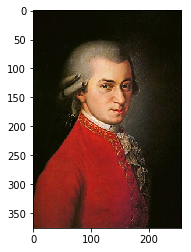

In [17]:
img = cv2.imread('Mozart.jpg', cv2.IMREAD_COLOR)

# If the image path is wrong, the resulting img will be none
if img is None:
    print('Open Error')
else:
    print('Image Loaded')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [8]:
# Check the resulting img
print(type(img))
print(img.shape)
print(img.dtype)
print(img[:2, :2, :])  # Right-upper-most few pixels of the image

<class 'numpy.ndarray'>
(376, 256, 3)
uint8
[[[ 4 11 14]
  [ 4 11 14]]

 [[ 4 11 14]
  [ 4 11 14]]]


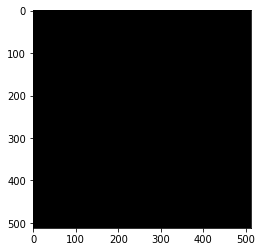

In [10]:
# Create a black image
img2 = np.zeros((512,512,3), np.uint8)
plt.imshow(img2)

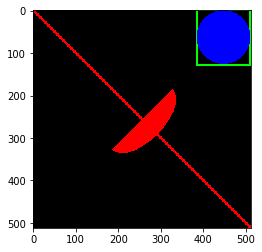

In [11]:

# Draw a line using cv2.line(image, startPoint, endPoint, rgb, thinkness)
cv2.line(img2, (0,0), (511,511), (255,0,0), 5)
# => Diagonal red line with thickness of 5 px

# Draw a rectangle using cv2.rectangle(image, topLeft, bottomRight, rgb, thinkness)
cv2.rectangle(img2, (384,0), (510,128), (0,255,0), 3)
# => Green rectangle with thickness of 3 px

# Draw a circle using cv2.circle(image, center, radius, rgb, thinkness)
cv2.circle(img2, (447,63), 63, (0,0,255), -1)
# => Blue filled circle(note that the thinkness is -1)

# Draw a ellipse using cv2.ellipse(image, center, axes, angle, startAngle, endAngle, rgb, thinkness)
cv2.ellipse(img2, (256,256), (100,50), -45, 0, 180, (255,0,0), -1)
# => Red wide down-half ellipse

plt.imshow(img2)

[[[ 10  10]]

 [[150 200]]

 [[300 150]]

 [[200  50]]]


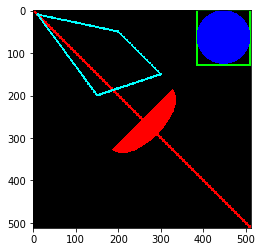

In [36]:
# Draw a line using cv2.polylines(image, points, isClosed, rgb, thinkness, lineType, shift)
pts = np.array([[10,10],[150,200],[300,150],[200,50]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img2,[pts],True,(0,255,255),3)
# => Cyan closed quadrangle 

print(pts)
plt.imshow(img2)

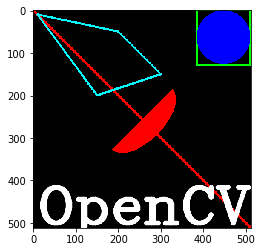

In [37]:
# Put some text using cv2.putText(image, text, bottomLeft, fontType, fontScale, rgb, thinkness, lineType)
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img2, 'OpenCV', (10,500), font, 4, (255,255,255), 10, cv2.LINE_AA)
# => White 'OpenCV' text at the bottom

plt.imshow(img2)

## 3. Accesando a datos de imágenes

In [38]:
# Access a pixel value(BGR order)
img[50, 135]

array([ 1, 11, 11], dtype=uint8)

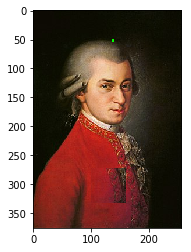

In [43]:
# Change pixel values
for i in range(5):
    for j in range(5):
        img[50+i, 135+j] = (0, 255, 0)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

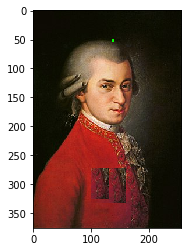

In [48]:
# ROI is obtained using Numpy indexing 
 = img[280:340, 130:190]
img[273:333, 100:160] = clothespattern 

# img[50:55, 235:240] = (0, 255, 0)  # The for-loop in the code block above is equavalent to this line. 

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 4.  Filtros


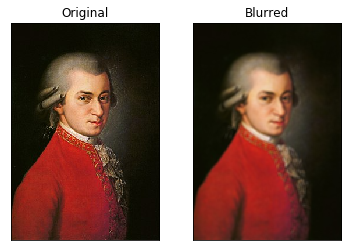

In [16]:
#Blurring
blur = cv2.blur(img,(5,5))
#gblur = cv2.GaussianBlur(img,(5,5),0)
#median = cv2.medianBlur(img,5)
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()